In [ ]:
from google.colab import files
file = files.upload()

Saving heart_attack_dataset.csv to heart_attack_dataset.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('heart_attack_dataset.csv')

In [ ]:
data

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication
...,...,...,...,...,...,...,...,...
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG)
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 1000 non-null   object  
 1   Age                    1000 non-null   int64   
 2   Blood Pressure (mmHg)  1000 non-null   int64   
 3   Cholesterol (mg/dL)    1000 non-null   int64   
 4   Has Diabetes           1000 non-null   object  
 5   Smoking Status         1000 non-null   object  
 6   Chest Pain Type        1000 non-null   object  
 7   Treatment              1000 non-null   object  
 8   Gender Num             1000 non-null   int64   
 9   Has Diabetes Num       1000 non-null   int64   
 10  Smoking Status Num     1000 non-null   int64   
 11  Age group              1000 non-null   category
 12  Chest Pain Type Num    1000 non-null   int8    
 13  Treatment Num          1000 non-null   int8    
dtypes: category(1), int64(6), int8(2), object

In [ ]:
missing_values = data.isna().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
print('Age mean: ', data['Age'].mean())
print('Age standard deviation: ', data['Age'].std())

Age mean:  60.338
Age standard deviation:  17.317495536354315


In [ ]:
print('Q1: ', data['Age'].quantile(0.25))
print('Q2: ', data['Age'].quantile(0.50))
print('Q3: ', data['Age'].quantile(0.75))

Q1:  45.0
Q2:  60.5
Q3:  76.0


In [ ]:
print('Blood Pressure mean: ', data['Blood Pressure (mmHg)'].mean())
print('Blood Pressure standard deviation: ', data['Blood Pressure (mmHg)'].std())

Blood Pressure mean:  145.44
Blood Pressure standard deviation:  31.756524949636365


In [ ]:
print('Q1: ', data['Blood Pressure (mmHg)'].quantile(0.25))
print('Q2: ', data['Blood Pressure (mmHg)'].quantile(0.50))
print('Q3: ', data['Blood Pressure (mmHg)'].quantile(0.75))

Q1:  118.0
Q2:  146.0
Q3:  173.0


In [ ]:
print('Cholesterol mean: ', data['Cholesterol (mg/dL)'].mean())
print('Cholesterol standard deviation: ', data['Cholesterol (mg/dL)'].std())

Cholesterol mean:  223.789
Cholesterol standard deviation:  42.78781691412026


In [ ]:
print('Q1: ', data['Cholesterol (mg/dL)'].quantile(0.25))
print('Q2: ', data['Cholesterol (mg/dL)'].quantile(0.50))
print('Q3: ', data['Cholesterol (mg/dL)'].quantile(0.75))

Q1:  185.0
Q2:  225.5
Q3:  259.0


In [ ]:
data['Gender Num'] = data['Gender'].map({'Male': 1,'Female': 0})

In [ ]:
data['Has Diabetes Num'] = data['Has Diabetes'].map({'Yes': 1,'No': 0})

In [ ]:
data['Smoking Status Num'] = data['Smoking Status'].map({'Never': 0,'Current': 1, 'Former': 2})

In [ ]:
data['Chest Pain Type Num'] = data['Chest Pain Type'].astype('category').cat.codes

In [ ]:
data['Treatment Num'] = data['Treatment'].astype('category').cat.codes

Кількість людей з холестерином > 240 за віковими групами

In [ ]:
filtered_ch_data = data[data['Cholesterol (mg/dL)'] > 240]

In [ ]:
bins = range(29, 90, 5)

data['Age group'] = pd.cut(data['Age'], bins = bins)

groups = filtered_ch_data.groupby('Age group').size()

<ipython-input-123-9ab4ba0e2a3a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = filtered_ch_data.groupby('Age group').size()


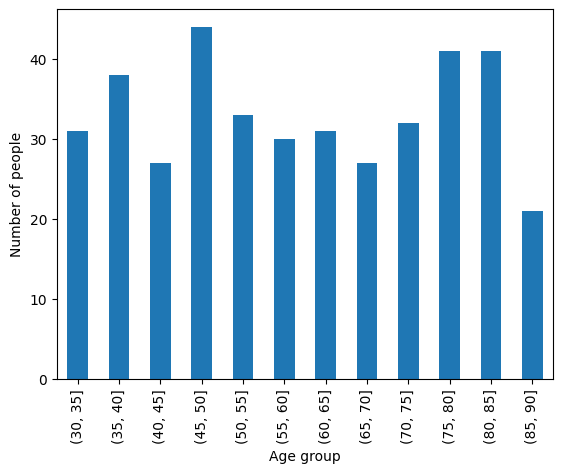

In [ ]:
groups.plot(kind='bar')

plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.show()

In [ ]:
data.columns

Index(['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)',
       'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment',
       'Gender Num', 'Has Diabetes Num', 'Smoking Status Num', 'Age group',
       'Chest Pain Type Num', 'Treatment Num'],
      dtype='object')

In [ ]:
correlation_matrix = data[['Gender Num', 'Age', 'Cholesterol (mg/dL)', 'Blood Pressure (mmHg)', 'Has Diabetes Num', 'Smoking Status Num', 'Treatment Num', 'Chest Pain Type Num']].corr()
correlation_matrix

,Gender Num,Age,Cholesterol (mg/dL),Blood Pressure (mmHg),Has Diabetes Num,Smoking Status Num,Treatment Num,Chest Pain Type Num
Gender Num,1.000000,-0.011398,0.028785,0.009731,-0.029343,-0.023852,-0.022097,0.030323
Age,-0.011398,1.000000,0.001661,-0.003303,0.006504,0.016873,0.097765,-0.043130
Cholesterol (mg/dL),0.028785,0.001661,1.000000,0.044316,-0.015063,-0.021932,-0.037818,-0.012866
Blood Pressure (mmHg),0.009731,-0.003303,0.044316,1.000000,-0.016423,0.051216,0.013163,0.001708
Has Diabetes Num,-0.029343,0.006504,-0.015063,-0.016423,1.000000,0.041416,0.015911,-0.023959
Smoking Status Num,-0.023852,0.016873,-0.021932,0.051216,0.041416,1.000000,-0.005437,0.011204
Treatment Num,-0.022097,0.097765,-0.037818,0.013163,0.015911,-0.005437,1.000000,-0.033514
Chest Pain Type Num,0.030323,-0.043130,-0.012866,0.001708,-0.023959,0.011204,-0.033514,1.000000


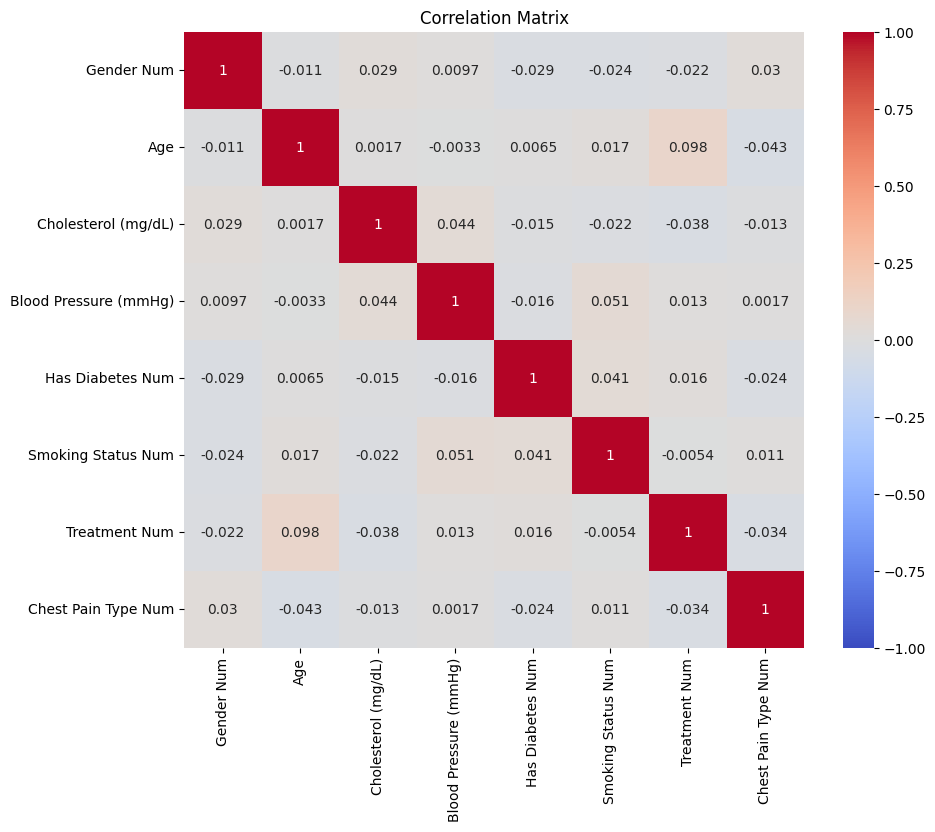

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

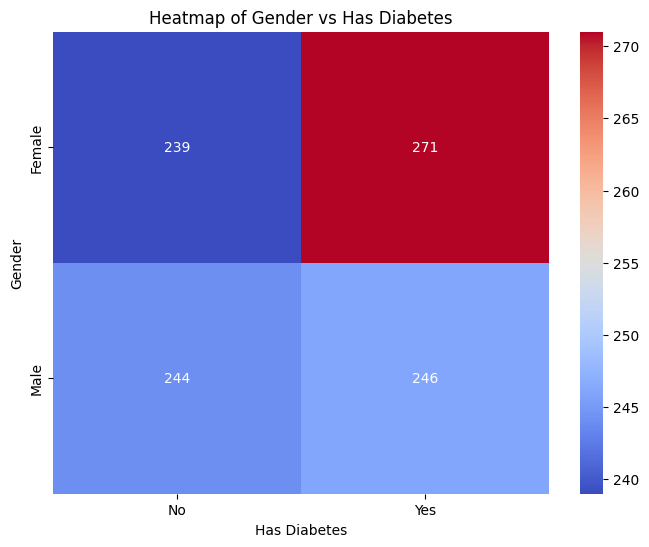

In [ ]:
cross_tab = pd.crosstab(data['Gender'], data['Has Diabetes'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Gender vs Has Diabetes')
plt.xlabel('Has Diabetes')
plt.ylabel('Gender')
plt.show()

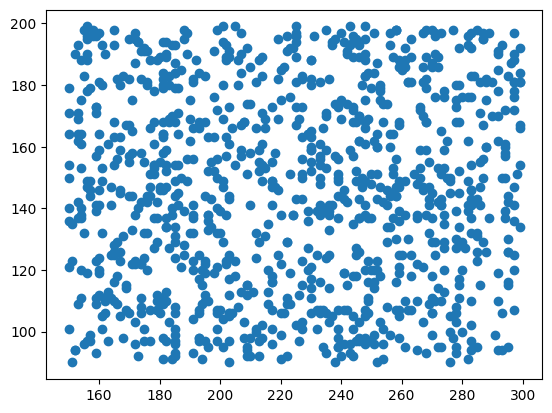

In [ ]:
plt.scatter(data['Cholesterol (mg/dL)'], data['Blood Pressure (mmHg)']);

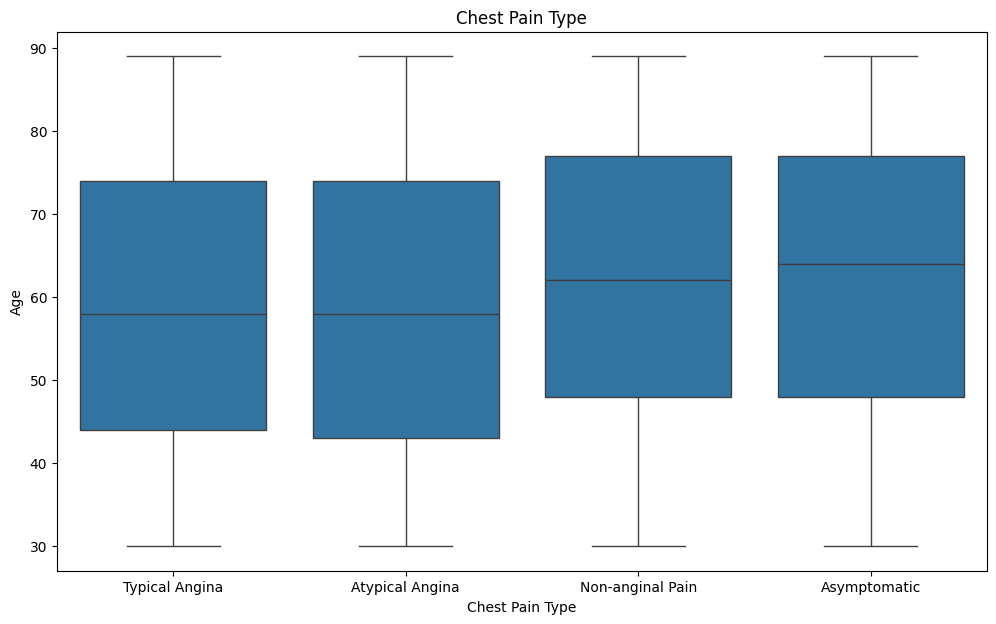

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Chest Pain Type', y = 'Age', data = data)
plt.title('Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()